In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df["log_score"] = np.log(df["score"] + 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197787 entries, 0 to 197786
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  197787 non-null  int64  
 1   year                        197787 non-null  int64  
 2   month                       197787 non-null  int64  
 3   title                       197787 non-null  object 
 4   link_flair_text             197787 non-null  object 
 5   domain                      197787 non-null  object 
 6   score                       197787 non-null  int64  
 7   num_comments                197787 non-null  int64  
 8   sensationalism_score        197787 non-null  float64
 9   jargon_proportion           197622 non-null  float64
 10  is_top_domain_social_media  197787 non-null  bool   
 11  is_top_domain_scientific    197787 non-null  bool   
 12  is_top_domain_news          197787 non-null  bool   
 13  is_top_domain_

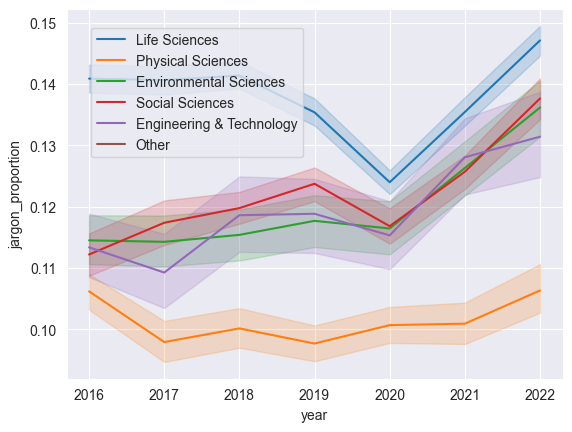

In [11]:
sns_plot = sns.lineplot(data=df, x="year", y="jargon_proportion", hue="top_category")
sns_plot.legend(bbox_to_anchor=(.05, .95), loc='upper left', borderaxespad=0.)


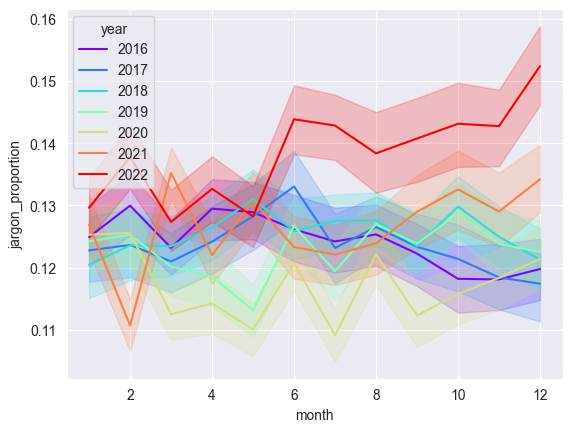

In [14]:
sns_plot = sns.lineplot(data=df, x="month", y="jargon_proportion", hue="year", palette="rainbow")

/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/518647633.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Life Sciences'),
 Text(1, 0, 'Physical Sciences'),
 Text(2, 0, 'Environmental Sciences'),
 Text(3, 0, 'Social Sciences'),
 Text(4, 0, 'Engineering & Technology')]

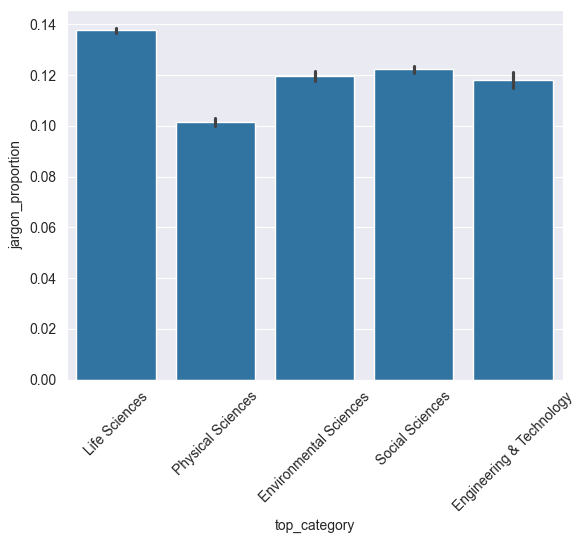

In [28]:
plot = sns.barplot(data=df[~(df["top_category"] == "Other")], x="top_category", y="jargon_proportion", errorbar=("ci", 99))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
# add error bars 


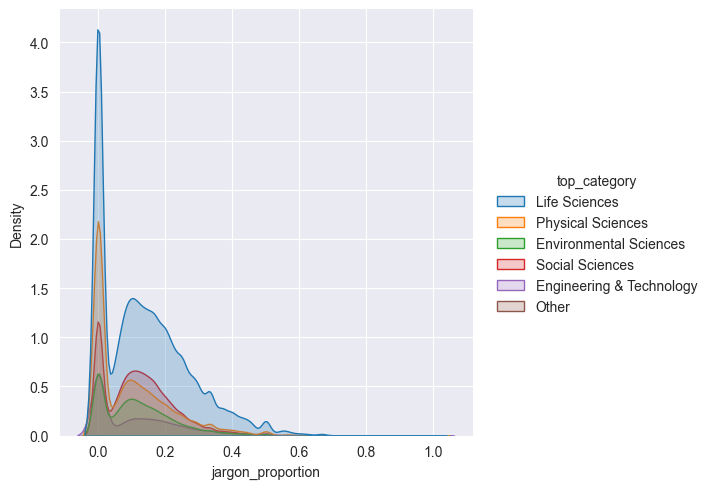

In [29]:
# distribution plot of scores for each category
sns_plot = sns.displot(data=df, x="jargon_proportion", hue="top_category", kind="kde", fill=True)

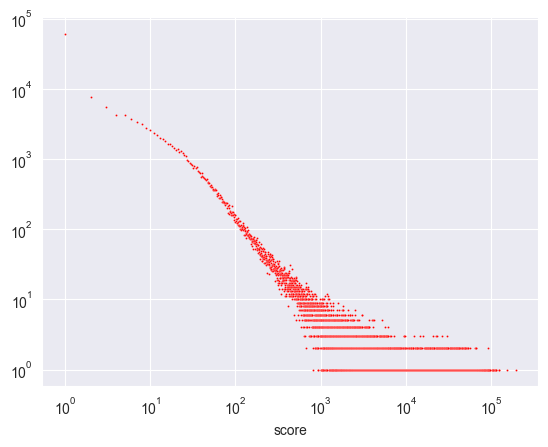

In [45]:
score_distribution = df['score'].value_counts().sort_index()
sns.scatterplot( x = score_distribution.index, y =  score_distribution.values, s=2, c="r")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Score (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Power-Law Distribution of Scores')

Text(0.5, 1.0, 'Distribution of Jargon Proportion')

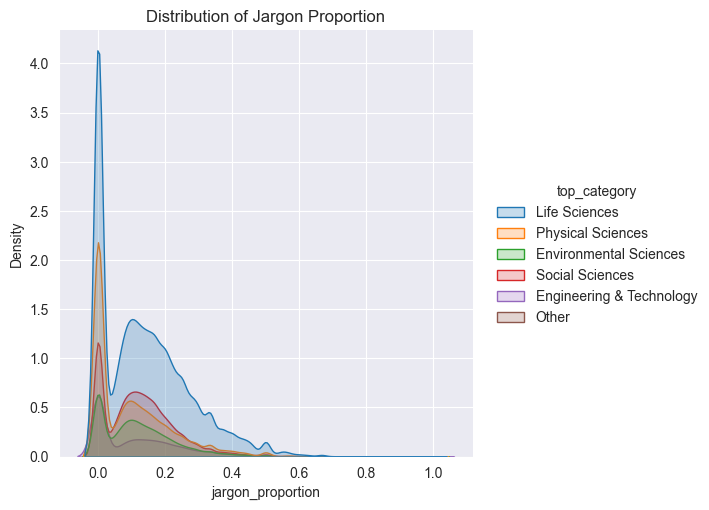

In [53]:
sns.displot(df, x = "jargon_proportion", kind="kde", fill=True, hue="top_category")
plt.title('Distribution of Jargon Proportion')

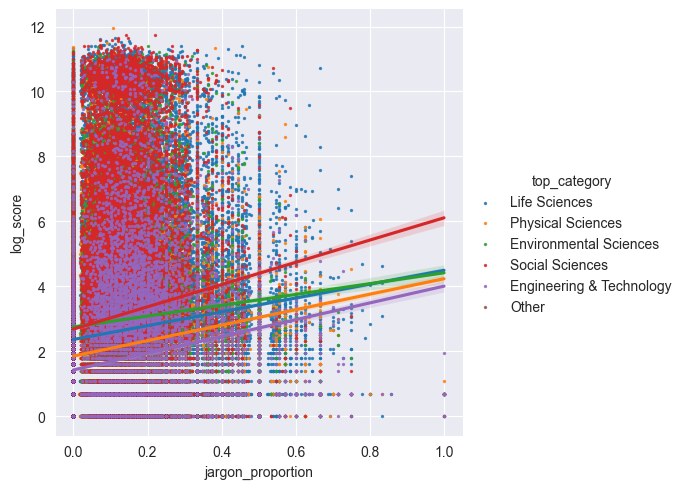

In [82]:
# add a regression line
sns.lmplot(data=df, x="jargon_proportion", y="log_score", hue="top_category", scatter_kws={'s':1})

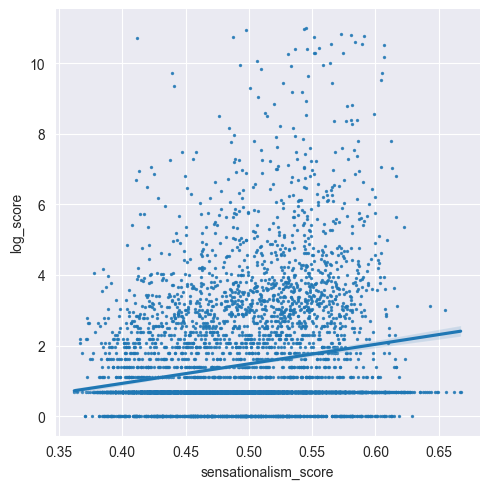

In [74]:
sns.lmplot(data=df[df["link_flair_text"] == "Computer Science"], x="sensationalism_score", y="log_score", scatter_kws={'s':2})

Text(0.5, 0.98, 'Sensationalism Score vs. Log-transformed Score by Category')

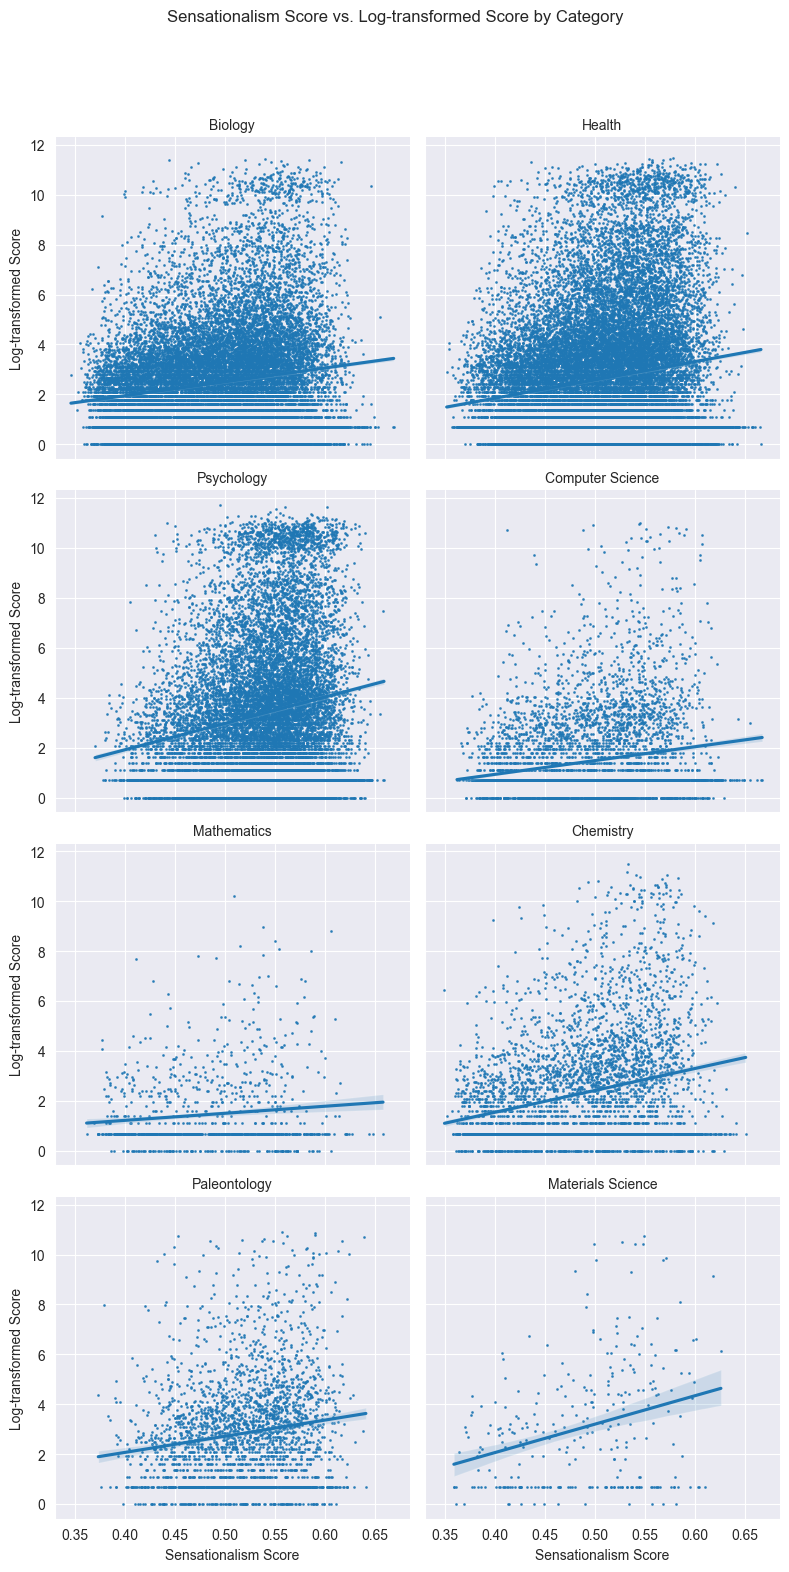

In [87]:
selected_categories = ["Computer Science", "Chemistry", "Biology", "Health", "Paleontology", "Materials Science", "Mathematics", "Psychology"]
filtered_df = df[df["link_flair_text"].isin(selected_categories)]

# Create a faceted plot with separate plots for each category
sns_plot = sns.lmplot(data=filtered_df, x="sensationalism_score", y="log_score", col="link_flair_text", 
                      scatter_kws={'s': 1}, col_wrap=2, height=4)

# Set axis labels for clarity
sns_plot.set_axis_labels("Sensationalism Score", "Log-transformed Score")
sns_plot.set_titles("{col_name}")

# Show the plot
sns_plot.fig.subplots_adjust(top=0.9)  # Adjust top to add space for the title if needed
sns_plot.fig.suptitle("Sensationalism Score vs. Log-transformed Score by Category")